In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf
import numpy as np
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.metrics import balanced_accuracy_score

In [3]:
credits_df = pd.read_csv('../Resources/cleaned_credits.csv')

In [5]:
titles_df = pd.read_csv('../Resources/cleaned_movie_db.csv')

In [6]:
merged_df = credits_df.merge(titles_df, on= "id")
merged_df

,index_x,person_id,id,name,role,index_y,title,movie,release_year,age_certification,runtime,genres,production_countries,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,0,3748,tm84618,Robert De Niro,ACTOR,1,Taxi Driver,MOVIE,1976,R,113,"[''crime'', ''drama'']",['US'],tt0075314,8.3,795222.0,27.612,8.2
1,1,14658,tm84618,Jodie Foster,ACTOR,1,Taxi Driver,MOVIE,1976,R,113,"[''crime'', ''drama'']",['US'],tt0075314,8.3,795222.0,27.612,8.2
2,2,7064,tm84618,Albert Brooks,ACTOR,1,Taxi Driver,MOVIE,1976,R,113,"[''crime'', ''drama'']",['US'],tt0075314,8.3,795222.0,27.612,8.2
3,3,3739,tm84618,Harvey Keitel,ACTOR,1,Taxi Driver,MOVIE,1976,R,113,"[''crime'', ''drama'']",['US'],tt0075314,8.3,795222.0,27.612,8.2
4,4,48933,tm84618,Cybill Shepherd,ACTOR,1,Taxi Driver,MOVIE,1976,R,113,"[''crime'', ''drama'']",['US'],tt0075314,8.3,795222.0,27.612,8.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34128,76497,1185475,tm1019084,Antonia Gentry,ACTOR,5720,Ginny & Georgia - The Afterparty,MOVIE,2021,R,35,[],"[''US'', ''CA'']",NaN,NaN,NaN,7.610,7.8
34129,76498,57076,tm1019084,Jennifer Robertson,ACTOR,5720,Ginny & Georgia - The Afterparty,MOVIE,2021,R,35,[],"[''US'', ''CA'']",NaN,NaN,NaN,7.610,7.8
34130,76499,85368,tm1019084,Sara Waisglass,ACTOR,5720,Ginny & Georgia - The Afterparty,MOVIE,2021,R,35,[],"[''US'', ''CA'']",NaN,NaN,NaN,7.610,7.8
34131,77011,2040919,tm1094060,Robin Wiltshire,ACTOR,5777,My Heroes Were Cowboys,MOVIE,2021,PG,23,['documentation'],['US'],tt15084326,NaN,NaN,3.688,7.7


In [7]:
merged_df.name.value_counts()

Fred Armisen                15
Marcus Raboy                15
Jay Karas                   15
Fred Tatasciore             15
Adam Sandler                14
                            ..
AnnaCorey                    1
Moises Amaya                 1
Natalie Stephany Aguilar     1
Derek W. Adam                1
Tyler Greco                  1
Name: name, Length: 26012, dtype: int64

In [8]:
mdf= merged_df.drop(columns=["index_x","index_y", "name", "role", "person_id", "movie", "release_year", "age_certification", "genres", "production_countries"])

In [9]:
mdf

,id,title,runtime,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,tm84618,Taxi Driver,113,tt0075314,8.3,795222.0,27.612,8.2
1,tm84618,Taxi Driver,113,tt0075314,8.3,795222.0,27.612,8.2
2,tm84618,Taxi Driver,113,tt0075314,8.3,795222.0,27.612,8.2
3,tm84618,Taxi Driver,113,tt0075314,8.3,795222.0,27.612,8.2
4,tm84618,Taxi Driver,113,tt0075314,8.3,795222.0,27.612,8.2
...,...,...,...,...,...,...,...,...
34128,tm1019084,Ginny & Georgia - The Afterparty,35,NaN,NaN,NaN,7.610,7.8
34129,tm1019084,Ginny & Georgia - The Afterparty,35,NaN,NaN,NaN,7.610,7.8
34130,tm1019084,Ginny & Georgia - The Afterparty,35,NaN,NaN,NaN,7.610,7.8
34131,tm1094060,My Heroes Were Cowboys,23,tt15084326,NaN,NaN,3.688,7.7


In [10]:
cleaned_df = mdf.dropna()

In [11]:
imdb_counts = cleaned_df.imdb_votes.value_counts()
imdb_counts

325132.0    208
371209.0    174
128190.0    150
7013.0      139
300074.0    137
           ... 
124.0         1
272.0         1
117.0         1
1502.0        1
157.0         1
Name: imdb_votes, Length: 1320, dtype: int64

<AxesSubplot:ylabel='Density'>

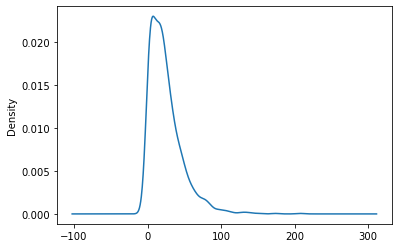

In [12]:
imdb_counts.plot.density()

In [13]:
from numpy import NaN
# Determine which values to replace if greater than 1000.
replace_votes = list(imdb_counts[imdb_counts < 10000].index)

# Replace in DataFrame
for votes in replace_votes:
  if votes <= 50000:
    cleaned_df.imdb_votes = cleaned_df.imdb_votes.replace(votes,str("Less than 50000"))
  elif votes < 100000:
    cleaned_df.imdb_votes = cleaned_df.imdb_votes.replace(votes,str("50000-99999"))
  elif votes < 150000:
    cleaned_df.imdb_votes = cleaned_df.imdb_votes.replace(votes,str("100000-149999"))
  elif votes < 200000:
    cleaned_df.imdb_votes = cleaned_df.imdb_votes.replace(votes,str("150000-199999"))
  elif votes < 250000:
    cleaned_df.imdb_votes = cleaned_df.imdb_votes.replace(votes,str("200000-249999"))
  elif votes < 300000:
    cleaned_df.imdb_votes = cleaned_df.imdb_votes.replace(votes,str("250000-299999"))
  elif votes < 350000:
    cleaned_df.imdb_votes = cleaned_df.imdb_votes.replace(votes,str("300000-349999"))
  else:
    cleaned_df.imdb_votes = cleaned_df.imdb_votes.replace(votes,str("350000+"))

# mdf.imdb_votes = mdf.imdb_votes.astype(str)

# Check if binning was successful
cleaned_df.imdb_votes.value_counts()



c:\Users\equan\anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


Less than 50000    17774
50000-99999         4704
100000-149999       3550
350000+             2401
150000-199999       1359
250000-299999       1054
200000-249999        944
300000-349999        839
Name: imdb_votes, dtype: int64

In [14]:
cleaned_df

,id,title,runtime,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,tm84618,Taxi Driver,113,tt0075314,8.3,350000+,27.612,8.2
1,tm84618,Taxi Driver,113,tt0075314,8.3,350000+,27.612,8.2
2,tm84618,Taxi Driver,113,tt0075314,8.3,350000+,27.612,8.2
3,tm84618,Taxi Driver,113,tt0075314,8.3,350000+,27.612,8.2
4,tm84618,Taxi Driver,113,tt0075314,8.3,350000+,27.612,8.2
...,...,...,...,...,...,...,...,...
34119,tm1080114,Hostage House,90,tt13033790,3.9,Less than 50000,5.541,6.8
34120,tm1099320,Convergence: Courage in a Crisis,113,tt15398694,5.4,Less than 50000,9.258,5.2
34121,tm1099320,Convergence: Courage in a Crisis,113,tt15398694,5.4,Less than 50000,9.258,5.2
34122,tm1099320,Convergence: Courage in a Crisis,113,tt15398694,5.4,Less than 50000,9.258,5.2


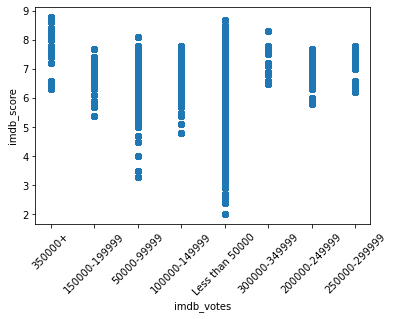

In [15]:
plt.scatter(cleaned_df['imdb_votes'], cleaned_df['imdb_score'])
plt.xlabel('imdb_votes')
plt.ylabel("imdb_score")
plt.xticks(rotation=45)
plt.show()

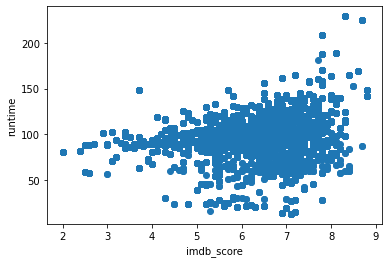

In [16]:
plt.scatter(cleaned_df['imdb_score'], cleaned_df['runtime'])
plt.xlabel('imdb_score')
plt.ylabel('runtime')
plt.show()

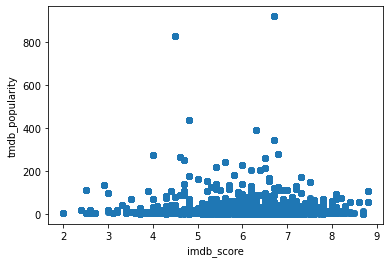

In [17]:
plt.scatter(cleaned_df['imdb_score'], cleaned_df['tmdb_popularity'])
plt.xlabel('imdb_score')
plt.ylabel('tmdb_popularity')
plt.show()

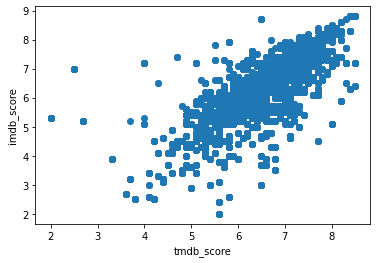

In [18]:
plt.scatter(cleaned_df['tmdb_score'], cleaned_df['imdb_score'])
plt.xlabel('tmdb_score')
plt.ylabel('imdb_score')
plt.show()

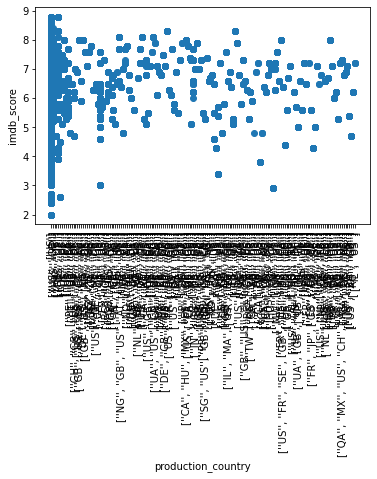

In [19]:
plt.scatter(merged_df['production_countries'], merged_df['imdb_score'])
plt.xlabel('production_country')
plt.ylabel('imdb_score')
plt.xticks(rotation=90)
plt.show()

In [20]:
X = cleaned_df.drop(columns="imdb_score")
X = pd.get_dummies(cleaned_df, columns=["id", "title", "imdb_id", "imdb_votes"])
y = cleaned_df["imdb_score"]

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,
    y, random_state=1, stratify=y)
X_train.shape

(24468, 4129)

In [22]:
X.describe()

,runtime,imdb_score,tmdb_popularity,tmdb_score,id_tm1001108,id_tm1001267,id_tm1002815,id_tm1003034,id_tm1003261,id_tm1003353,...,imdb_id_tt9893250,imdb_id_tt9898858,imdb_votes_100000-149999,imdb_votes_150000-199999,imdb_votes_200000-249999,imdb_votes_250000-299999,imdb_votes_300000-349999,imdb_votes_350000+,imdb_votes_50000-99999,imdb_votes_Less than 50000
count,32625.000000,32625.000000,32625.000000,32625.000000,32625.000000,32625.000000,32625.00000,32625.000000,32625.000000,32625.000000,...,32625.000000,32625.000000,32625.000000,32625.000000,32625.000000,32625.000000,32625.000000,32625.000000,32625.000000,32625.000000
mean,106.238866,6.363215,29.803480,6.525588,0.001471,0.000215,0.00049,0.000889,0.000061,0.000736,...,0.000613,0.000613,0.108812,0.041655,0.028935,0.032307,0.025716,0.073594,0.144184,0.544797
std,23.515243,1.029581,45.532805,0.823876,0.038329,0.014646,0.02214,0.029801,0.007829,0.027113,...,0.024752,0.024752,0.311408,0.199803,0.167626,0.176816,0.158291,0.261113,0.351281,0.497997
min,13.000000,2.000000,0.600000,2.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,93.000000,5.700000,10.970000,6.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,103.000000,6.500000,16.841000,6.600000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,119.000000,7.100000,31.774000,7.100000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,229.000000,8.800000,919.599000,8.500000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [23]:
y.value_counts()

6.5    1544
6.7    1396
6.3    1356
6.6    1342
6.8    1241
       ... 
2.0      16
2.4      13
2.7      12
8.7       9
8.5       3
Name: imdb_score, Length: 65, dtype: int64

In [24]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [25]:
print('R-squared: {:.4f}'.format(model.score(X, y)))

R-squared: 1.0000


In [26]:

y_pred = model.predict(X_train)
print(y_pred.shape)


(24468,)


In [27]:
# X_train=np.arange(0,len(X_train),1)

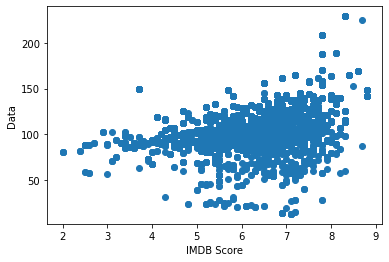

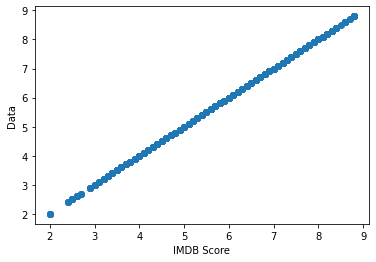

In [28]:
plt.figure(2)
plt.scatter(y_test, X_test.iloc[:,0].values)
plt.xlabel("IMDB Score")
plt.ylabel("Data")

plt.figure(3)
plt.scatter(y_test, X_test.iloc[:,1].values)
plt.xlabel("IMDB Score")
plt.ylabel("Data")

plt.show()


In [29]:
X_scaler = skl.preprocessing.StandardScaler()

X_scaler.fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

Merged DF Linear Regression


In [30]:
mdf2 = merged_df.drop(columns=["index_x","index_y", "name", "movie"])

In [31]:
mdf2

,person_id,id,role,title,release_year,age_certification,runtime,genres,production_countries,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,3748,tm84618,ACTOR,Taxi Driver,1976,R,113,"[''crime'', ''drama'']",['US'],tt0075314,8.3,795222.0,27.612,8.2
1,14658,tm84618,ACTOR,Taxi Driver,1976,R,113,"[''crime'', ''drama'']",['US'],tt0075314,8.3,795222.0,27.612,8.2
2,7064,tm84618,ACTOR,Taxi Driver,1976,R,113,"[''crime'', ''drama'']",['US'],tt0075314,8.3,795222.0,27.612,8.2
3,3739,tm84618,ACTOR,Taxi Driver,1976,R,113,"[''crime'', ''drama'']",['US'],tt0075314,8.3,795222.0,27.612,8.2
4,48933,tm84618,ACTOR,Taxi Driver,1976,R,113,"[''crime'', ''drama'']",['US'],tt0075314,8.3,795222.0,27.612,8.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34128,1185475,tm1019084,ACTOR,Ginny & Georgia - The Afterparty,2021,R,35,[],"[''US'', ''CA'']",NaN,NaN,NaN,7.610,7.8
34129,57076,tm1019084,ACTOR,Ginny & Georgia - The Afterparty,2021,R,35,[],"[''US'', ''CA'']",NaN,NaN,NaN,7.610,7.8
34130,85368,tm1019084,ACTOR,Ginny & Georgia - The Afterparty,2021,R,35,[],"[''US'', ''CA'']",NaN,NaN,NaN,7.610,7.8
34131,2040919,tm1094060,ACTOR,My Heroes Were Cowboys,2021,PG,23,['documentation'],['US'],tt15084326,NaN,NaN,3.688,7.7


In [32]:
cleaned_df2 = mdf2.dropna()

In [33]:
# Determine which values to replace if greater than 1000.
replace_votes = list(imdb_counts[imdb_counts < 10000].index)

# Replace in DataFrame
for votes in replace_votes:
  if votes <= 50000:
    cleaned_df2.imdb_votes = cleaned_df2.imdb_votes.replace(votes,str("Less than 50000"))
  elif votes < 100000:
    cleaned_df2.imdb_votes = cleaned_df2.imdb_votes.replace(votes,str("50000-99999"))
  elif votes < 150000:
    cleaned_df2.imdb_votes = cleaned_df2.imdb_votes.replace(votes,str("100000-149999"))
  elif votes < 200000:
    cleaned_df2.imdb_votes = cleaned_df2.imdb_votes.replace(votes,str("150000-199999"))
  elif votes < 250000:
    cleaned_df2.imdb_votes = cleaned_df2.imdb_votes.replace(votes,str("200000-249999"))
  elif votes < 300000:
    cleaned_df2.imdb_votes = cleaned_df2.imdb_votes.replace(votes,str("250000-299999"))
  elif votes < 350000:
    cleaned_df2.imdb_votes = cleaned_df2.imdb_votes.replace(votes,str("300000-349999"))
  else:
    cleaned_df2.imdb_votes = cleaned_df2.imdb_votes.replace(votes,str("350000+"))

# mdf.imdb_votes = mdf.imdb_votes.astype(str)

# Check if binning was successful
cleaned_df2.imdb_votes.value_counts()

c:\Users\equan\anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


Less than 50000    10418
50000-99999         4393
100000-149999       3511
350000+             2294
150000-199999       1359
250000-299999        981
200000-249999        944
300000-349999        839
Name: imdb_votes, dtype: int64

In [34]:
# bin imdb_scores with a cutoff of 8.0 for score
scores = cleaned_df2['imdb_score'].copy()

for score in scores:
  if score >= 8.0:
    cleaned_df2["imdb_score"] = cleaned_df2.imdb_score.replace(score,str("good_score"))
  else:
    cleaned_df2["imdb_score"] = cleaned_df2.imdb_score.replace(score,str("bad_score"))

# check to see if binning was successful
cleaned_df.imdb_score.value_counts()

C:\Users\equan\AppData\Local\Temp/ipykernel_21384/3923908852.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df2["imdb_score"] = cleaned_df2.imdb_score.replace(score,str("good_score"))
C:\Users\equan\AppData\Local\Temp/ipykernel_21384/3923908852.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df2["imdb_score"] = cleaned_df2.imdb_score.replace(score,str("bad_score"))


6.5    1544
6.7    1396
6.3    1356
6.6    1342
6.8    1241
       ... 
2.0      16
2.4      13
2.7      12
8.7       9
8.5       3
Name: imdb_score, Length: 65, dtype: int64

In [35]:
cleaned_df2

,person_id,id,role,title,release_year,age_certification,runtime,genres,production_countries,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,3748,tm84618,ACTOR,Taxi Driver,1976,R,113,"[''crime'', ''drama'']",['US'],tt0075314,good_score,350000+,27.612,8.2
1,14658,tm84618,ACTOR,Taxi Driver,1976,R,113,"[''crime'', ''drama'']",['US'],tt0075314,good_score,350000+,27.612,8.2
2,7064,tm84618,ACTOR,Taxi Driver,1976,R,113,"[''crime'', ''drama'']",['US'],tt0075314,good_score,350000+,27.612,8.2
3,3739,tm84618,ACTOR,Taxi Driver,1976,R,113,"[''crime'', ''drama'']",['US'],tt0075314,good_score,350000+,27.612,8.2
4,48933,tm84618,ACTOR,Taxi Driver,1976,R,113,"[''crime'', ''drama'']",['US'],tt0075314,good_score,350000+,27.612,8.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34109,184181,tm1033635,DIRECTOR,Sisters on Track,2021,PG,96,"[''documentation'', ''sport'']",['US'],tt9337574,bad_score,Less than 50000,15.497,7.2
34120,2054167,tm1099320,ACTOR,Convergence: Courage in a Crisis,2021,R,113,['documentation'],"[''US'', ''GB'']",tt15398694,bad_score,Less than 50000,9.258,5.2
34121,1016583,tm1099320,ACTOR,Convergence: Courage in a Crisis,2021,R,113,['documentation'],"[''US'', ''GB'']",tt15398694,bad_score,Less than 50000,9.258,5.2
34122,2061132,tm1099320,ACTOR,Convergence: Courage in a Crisis,2021,R,113,['documentation'],"[''US'', ''GB'']",tt15398694,bad_score,Less than 50000,9.258,5.2


In [36]:
X = cleaned_df2.drop(columns="imdb_score")
X = pd.get_dummies(cleaned_df2, columns=["id", "role", "title", "age_certification", "genres", "production_countries", "imdb_id", "imdb_score", "imdb_votes"])
y = cleaned_df2["imdb_score"]

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X,
    y, random_state=1, stratify=y)
X_train.shape

(18554, 2861)

In [38]:
X.describe()

,person_id,release_year,runtime,tmdb_popularity,tmdb_score,id_tm1001108,id_tm1003353,id_tm1003630,id_tm101249,id_tm101334,...,imdb_score_bad_score,imdb_score_good_score,imdb_votes_100000-149999,imdb_votes_150000-199999,imdb_votes_200000-249999,imdb_votes_250000-299999,imdb_votes_300000-349999,imdb_votes_350000+,imdb_votes_50000-99999,imdb_votes_Less than 50000
count,2.473900e+04,24739.000000,24739.000000,24739.000000,24739.000000,24739.000000,24739.000000,24739.000000,24739.000000,24739.000000,...,24739.000000,24739.000000,24739.000000,24739.000000,24739.000000,24739.000000,24739.000000,24739.000000,24739.000000,24739.000000
mean,4.135006e+05,2012.120538,110.534581,33.952299,6.571717,0.001940,0.000970,0.000849,0.001011,0.000808,...,0.955172,0.044828,0.141922,0.054934,0.038158,0.039654,0.033914,0.092728,0.177574,0.421116
std,5.816080e+05,9.290887,22.491052,49.237333,0.809428,0.044006,0.031132,0.029123,0.031774,0.028422,...,0.206930,0.206930,0.348977,0.227855,0.191582,0.195149,0.181012,0.290057,0.382161,0.493748
min,7.000000e+00,1964.000000,13.000000,0.600000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.498900e+04,2008.000000,95.000000,13.293000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.947100e+04,2015.000000,107.000000,19.682000,6.600000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.998740e+05,2019.000000,122.000000,38.136000,7.200000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,2.361651e+06,2022.000000,229.000000,919.599000,8.500000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [39]:
y.value_counts()

bad_score     23630
good_score     1109
Name: imdb_score, dtype: int64

In [40]:
# Resample the training data with the BalancedRandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
brfc = BalancedRandomForestClassifier()
brfc.fit(X_train, y_train)

ModuleNotFoundError: No module named 'imblearn'

In [43]:
# Calculated the balanced accuracy score
# YOUR CODE HEREfrom sklearn.metrics import balanced_accuracy_score
y_pred = brfc.predict(X_test)
balanced_accuracy_score(y_test, y_pred)

1.0

In [44]:
# Display the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[5908,    0],
       [   0,  277]])

In [45]:
# Print the imbalanced classification report
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

  bad_score       1.00      1.00      1.00      1.00      1.00      1.00      5908
 good_score       1.00      1.00      1.00      1.00      1.00      1.00       277

avg / total       1.00      1.00      1.00      1.00      1.00      1.00      6185



In [46]:
# List the features sorted in descending order by feature importance
priority_features = pd.Series(data=brfc.feature_importances_,index=X.columns)
priority_features.sort_values(ascending=False,inplace=True)
print(priority_features)

imdb_score_good_score              0.204248
imdb_score_bad_score               0.132358
tmdb_score                         0.107558
imdb_votes_350000+                 0.086007
runtime                            0.060086
                                     ...   
title_Monster High: Electrified    0.000000
title_Monster                      0.000000
title_Miss Americana               0.000000
title_Midnight Sun                 0.000000
title_The Prom                     0.000000
Length: 2861, dtype: float64


Naive Random Oversampling

In [47]:
from collections import Counter
# Resample the training data with the RandomOversampler
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=1)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

Counter(y_resampled)

Counter({'bad_score': 17722, 'good_score': 17722})

In [48]:
# Train the Logistic Regression model using the resampled data
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_resampled, y_resampled)

LogisticRegression(random_state=1)

In [49]:
y_pred = model.predict(X_test)

balanced_accuracy_score(y_test, y_pred)

0.7383019781047053

In [50]:
confusion_matrix(y_test, y_pred)

array([[4778, 1130],
       [  92,  185]])

In [51]:
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

  bad_score       0.98      0.81      0.67      0.89      0.73      0.55      5908
 good_score       0.14      0.67      0.81      0.23      0.73      0.53       277

avg / total       0.94      0.80      0.67      0.86      0.73      0.55      6185



SMOTE Oversampling

In [52]:
# Resample the training data with SMOTE
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE(random_state=1, sampling_strategy='auto').fit_resample(
    X_train, y_train
)
Counter(y_resampled)

Counter({'bad_score': 17722, 'good_score': 17722})

In [53]:
# Train the Logistic Regression model using the resampled data
model_2 = LogisticRegression(solver='lbfgs', random_state=1)
model_2.fit(X_resampled, y_resampled)

LogisticRegression(random_state=1)

In [54]:
# Calculated the balanced accuracy score
y_pred = model.predict(X_test)
balanced_accuracy_score(y_test, y_pred)

0.7383019781047053

In [55]:
# Display the confusion matrix
confusion_matrix(y_test, y_pred)

array([[4778, 1130],
       [  92,  185]])

In [56]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

  bad_score       0.98      0.81      0.67      0.89      0.73      0.55      5908
 good_score       0.14      0.67      0.81      0.23      0.73      0.53       277

avg / total       0.94      0.80      0.67      0.86      0.73      0.55      6185



Undersampling

In [57]:
# Resample the data using the ClusterCentroids resampler
# Warning: This is a large dataset, and this step may take some time to complete
from imblearn.under_sampling import ClusterCentroids
cc = ClusterCentroids(random_state=1)
X_resampled, y_resampled = cc.fit_resample(X_train, y_train)
Counter(y_resampled)

Counter({'bad_score': 832, 'good_score': 832})

In [58]:
# Train the Logistic Regression model using the resampled data
model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_resampled, y_resampled)

LogisticRegression(random_state=1)

In [59]:
# Calculated the balanced accuracy score
y_pred = model.predict(X_test)
balanced_accuracy_score(y_test, y_pred)

0.7577197534274032

In [60]:

# Display the confusion matrix
confusion_matrix(y_test, y_pred)

array([[4005, 1903],
       [  45,  232]])

In [61]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

  bad_score       0.99      0.68      0.84      0.80      0.75      0.56      5908
 good_score       0.11      0.84      0.68      0.19      0.75      0.58       277

avg / total       0.95      0.69      0.83      0.78      0.75      0.56      6185



In [ ]:
# Exxporting unique Dataframe from the notebook to a csv. Movies with top IMDB Scores
imdb_votes.to_csv('grouped votes')


# Exporting Top Actors to CSV
actors2.to_csv('Top Actors')


# Exporting Top Directors to CSV
directors2.to_csv('Top Directors')